Working with Images & Logistic Regression in PyTorch

In this notebook I'll be performing logistics regression on the MNIST dataset


In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
dataset = MNIST(root='data/', download=True)

In [3]:
#We see there are 60,000 images in this dataset
len(dataset)

60000

In [4]:
#We are instantiating the testing dataset by using train = False
test_dataset = MNIST(root='data/', train=False)

In [5]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x122E652E0>, 5)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

Label:  5


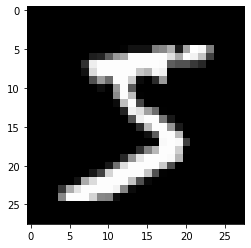

In [7]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label: ', label)

In [8]:
#The transforms module simply takes variables of differing datatypes nd transforms them into tensors
import torchvision.transforms as transforms

In [9]:
dataset = MNIST(root='data/', train=True, transform=transforms.ToTensor()) 
#Each element in the dataset is a 1 x 28 x 28 tensor where each entry is a pixel filled with its color intensity

In [10]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [11]:
print(img_tensor[:, 10:15, 10:15])

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])


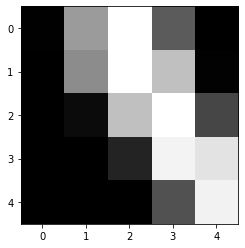

In [12]:
#Images are just matrices of pixels that can have different channels of intensity for each color
plt.imshow(img_tensor[0, 10:15, 10:15], cmap='gray')

    Training and Validation Datasets
While building real-world machine learning models, it is quite common to split the dataset into three parts:

Training set - used to train the model, i.e., compute the loss and adjust the model's weights using gradient descent.
Validation set - used to evaluate the model during training, adjust hyperparameters (learning rate, etc.), and pick the best version of the model.

Test set - used to compare different models or approaches and report the model's final accuracy.
In the MNIST dataset, there are 60,000 training images and 10,000 test images. The test set is standardized so that different researchers can report their models' results against the same collection of images.

Since there's no predefined validation set, we must manually split the 60,000 images into training and validation datasets. Let's set aside 10,000 randomly chosen images for validation. We can do this using the random_spilt method from PyTorch.

In [13]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])

In [14]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [15]:
import torch.nn as nn

In [16]:
input_size = 28 * 28
num_classes = 10

model = nn.Linear(input_size, num_classes)

In [17]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0190,  0.0189, -0.0339,  ..., -0.0262,  0.0077,  0.0162],
        [-0.0217, -0.0190,  0.0335,  ...,  0.0192, -0.0155,  0.0060],
        [ 0.0292, -0.0026,  0.0290,  ...,  0.0301,  0.0251,  0.0310],
        ...,
        [ 0.0035, -0.0314,  0.0096,  ...,  0.0124, -0.0275,  0.0027],
        [ 0.0253, -0.0048,  0.0270,  ..., -0.0297, -0.0003, -0.0198],
        [-0.0110,  0.0120, -0.0104,  ...,  0.0201, -0.0043,  0.0322]],
       requires_grad=True)

In [18]:
'''
#We need to reshape the 28x28 tensors for each image into a size 784 vector
for images, labels in train_loader:
    print(images.shape)
    #This breaks because the images are not represented as single vectors
    output = model(images)
'''

'\n#We need to reshape the 28x28 tensors for each image into a size 784 vector\nfor images, labels in train_loader:\n    print(images.shape)\n    #This breaks because the images are not represented as single vectors\n    output = model(images)\n'

In [19]:
'''
#We overcome this by using .reshape()
print(images.shape)
images.reshape(128, 784).shape
'''

'\n#We overcome this by using .reshape()\nprint(images.shape)\nimages.reshape(128, 784).shape\n'

In [20]:
class MNISTModel(nn.Module):
    def __init__(self):
        #Since we're extending this class within another class, we have to call the constructor of the superclass first
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
    #The forward function is invoked when you pass a batch of data into the model
    def forward(self, xb):
        #Using the -1 allows us to use a dynamic batch size to make it more generic for
        xb = xb.reshape(-1, 784)
        output = self.linear(xb)
        return output
    

In [21]:
model = MNISTModel()

In [22]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [23]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0173,  0.0121, -0.0110,  ...,  0.0083, -0.0296,  0.0202],
         [-0.0226, -0.0302,  0.0052,  ...,  0.0143, -0.0110,  0.0311],
         [-0.0045,  0.0038, -0.0230,  ...,  0.0173, -0.0241,  0.0128],
         ...,
         [-0.0272, -0.0204, -0.0200,  ..., -0.0345, -0.0193,  0.0271],
         [-0.0157,  0.0341,  0.0212,  ...,  0.0089, -0.0285, -0.0190],
         [ 0.0080,  0.0127,  0.0008,  ..., -0.0111, -0.0131,  0.0295]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0256, -0.0151, -0.0345,  0.0021, -0.0348, -0.0292, -0.0038, -0.0110,
          0.0312, -0.0255], requires_grad=True)]

In [24]:
#Now it works!
for images, labels in train_loader:
    outputs = model(images)
    print(outputs.shape)
    break

torch.Size([128, 10])


In [25]:
import torch.nn.functional as F

In [26]:
#Apply soft max to each element in the output for an entry
probs = F.softmax(outputs, dim=1)

In [27]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

#Now we can train the model to make it learn using evaluating metrics

tensor([9, 9, 7, 8, 9, 4, 8, 3, 4, 4, 9, 4, 8, 9, 7, 7, 7, 3, 9, 7, 6, 9, 7, 3,
        6, 7, 9, 9, 8, 9, 4, 9, 9, 9, 7, 4, 8, 6, 9, 7, 9, 9, 9, 9, 9, 7, 3, 9,
        3, 8, 9, 7, 0, 9, 9, 9, 3, 3, 7, 9, 9, 9, 7, 0, 9, 3, 9, 7, 0, 9, 7, 4,
        6, 9, 9, 7, 7, 7, 3, 0, 9, 7, 9, 8, 3, 1, 3, 9, 4, 9, 8, 9, 4, 9, 9, 4,
        8, 7, 4, 9, 7, 9, 8, 3, 6, 9, 9, 7, 4, 7, 9, 4, 7, 1, 8, 9, 9, 9, 7, 4,
        4, 7, 9, 9, 4, 7, 4, 9])
tensor([0.1277, 0.1299, 0.1271, 0.1190, 0.1168, 0.1381, 0.1242, 0.1322, 0.1378,
        0.1590, 0.1345, 0.1370, 0.1238, 0.1338, 0.1328, 0.1260, 0.1259, 0.1248,
        0.1429, 0.1353, 0.1221, 0.1400, 0.1426, 0.1262, 0.1261, 0.1404, 0.1652,
        0.1383, 0.1317, 0.1264, 0.1529, 0.1235, 0.1438, 0.1190, 0.1242, 0.1170,
        0.1220, 0.1154, 0.1254, 0.1381, 0.1297, 0.1230, 0.1177, 0.1363, 0.1471,
        0.1271, 0.1553, 0.1555, 0.1154, 0.1372, 0.1565, 0.1247, 0.1499, 0.1410,
        0.1245, 0.1456, 0.1261, 0.1317, 0.1424, 0.1341, 0.1232, 0.1396, 0.1214,
       

In [28]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    #Returns the % of images correctly labeled
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [29]:
accuracy(outputs, labels)

tensor(0.1250)

In [30]:
loss_fn = F.cross_entropy


In [31]:
loss = loss_fn(outputs, labels) 
print(loss)

tensor(2.2756, grad_fn=<NllLossBackward0>)


In [32]:
#Training our model psuedocode

#for epoch in range(num_epochs):
    # Training phase
    #for batch in train_loader:
        # Generate predictions
        # Calculate loss
        # Compute gradients
        # Update weights
        # Reset gradients
    
    # Validation phase
    #for batch in val_loader:
        # Generate predictions
        # Calculate loss
        # Calculate metrics (accuracy etc.)
    # Calculate average validation loss & metrics
    
    # Log epoch, loss & metrics for inspection

In [33]:
def fit(epochs, lr, train_loader, val_loader, optfnc=torch.optim.SGD):

    optimizer = optfnc(model.parameters(), lr)
    history = []

    for epoch in range(epochs):
        #Training
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        #Validation
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    
    return history


In [34]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [35]:
class MNISTModel(nn.Module):
    def __init__(self):
        #Since we're extending this class within another class, we have to call the constructor of the superclass first
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
    #The forward function is invoked when you pass a batch of data into the model
    def forward(self, xb):
        #Using the -1 allows us to use a dynamic batch size to make it more generic for
        xb = xb.reshape(-1, 784)
        output = self.linear(xb)
        return output
    
    def training_step(self, batch):
        images, labels = batch
        #self(images) calls the forward functiion, which returns the output
        out = self(images)                  #Generates Predictions using self() as the model
        loss = F.cross_entropy(out, labels) #Generates loss of these predictions
        return loss
    
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                  #Generate Predictions
        loss = F.cross_entropy(out, labels) #Calculate Loss
        acc = accuracy(out, labels)         #Calculate Accuracy
        return {'val_loss': loss, 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))


In [36]:
import platform
platform.platform()
#Ensuring we are using GPU to train

'macOS-12.3.1-arm64-arm-64bit'

In [37]:
torch.has_mps

True

In [38]:
#Setting the device to use
device = torch.device('mps')

In [39]:
#Instantiating device w/ GPU
model = MNISTModel()
#model.to(device)

In [40]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.3406834602355957, 'val_acc': 0.15150316059589386}

In [41]:
history1 = fit(5, .001, train_loader, val_loader)

Epoch [0], val_loss: 1.9700, val_acc: 0.5659
Epoch [1], val_loss: 1.6998, val_acc: 0.6853
Epoch [2], val_loss: 1.4978, val_acc: 0.7459
Epoch [3], val_loss: 1.3450, val_acc: 0.7715
Epoch [4], val_loss: 1.2274, val_acc: 0.7895


In [42]:
history2 = fit(5, .001, train_loader, val_loader)

Epoch [0], val_loss: 1.1350, val_acc: 0.8002
Epoch [1], val_loss: 1.0607, val_acc: 0.8091
Epoch [2], val_loss: 0.9999, val_acc: 0.8164
Epoch [3], val_loss: 0.9492, val_acc: 0.8221
Epoch [4], val_loss: 0.9064, val_acc: 0.8259


In [43]:
history3 = fit(5, .001, train_loader, val_loader)

Epoch [0], val_loss: 0.8697, val_acc: 0.8296
Epoch [1], val_loss: 0.8379, val_acc: 0.8320
Epoch [2], val_loss: 0.8102, val_acc: 0.8357
Epoch [3], val_loss: 0.7856, val_acc: 0.8390
Epoch [4], val_loss: 0.7637, val_acc: 0.8413


In [44]:
history4 = fit(5, .001, train_loader, val_loader)

Epoch [0], val_loss: 0.7442, val_acc: 0.8431
Epoch [1], val_loss: 0.7264, val_acc: 0.8455
Epoch [2], val_loss: 0.7104, val_acc: 0.8474
Epoch [3], val_loss: 0.6958, val_acc: 0.8500
Epoch [4], val_loss: 0.6824, val_acc: 0.8514


Text(0.5, 1.0, 'Accuracy vs. # Epochs')

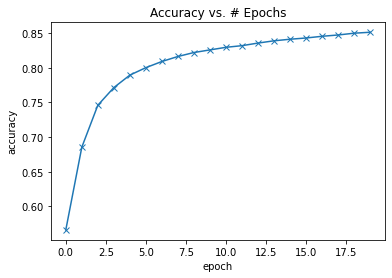

In [56]:
history = history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. # Epochs')

In [62]:
import jovian
jovian.commit(filename='3-logistic-regression.ipynb', project='3-logistic-regression', environment = None)

<IPython.core.display.Javascript object>

[jovian] Creating a new project "danielcufino/3-logistic-regression"
[jovian] Committed successfully! https://jovian.ai/danielcufino/3-logistic-regression


'https://jovian.ai/danielcufino/3-logistic-regression'

In [63]:
jovian.log_metrics(val_acc=history[-1]['val_acc'], val_loss=history[-1]['val_loss'])

[jovian] Metrics logged.


In [65]:
test_dataset = MNIST(root='data/', 
                        train=False, 
                        transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 


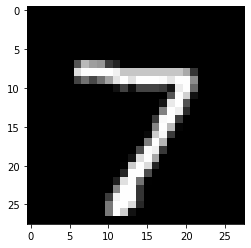

In [66]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape: {}'.format(img.shape))
print('Label: '.format(label))

In [67]:
def predict_image(img, model):
    #unsqueeze adds an an image to our data since our model has to always take in batches, even of size 1
    xb = img.unsqueeze(0)
    yb = model(xb)
    #get the index of the highest value element
    _, preds = torch.max(yb, dim=1)
    #.item() extracts the value out of a tensor
    return preds[0].item()

Label: 
Predicted: 7


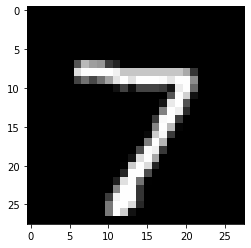

In [68]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label: '.format(label))
print('Predicted: {}'.format(predict_image(img, model)))


In [70]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.6451002955436707, 'val_acc': 0.858691394329071}

In [71]:
#Hpw to save a model
torch.save(model.state_dict(), 'mnist_logistic.pth')

In [73]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0179,  0.0086, -0.0332,  ...,  0.0276, -0.0221,  0.0259],
                      [-0.0218, -0.0285,  0.0067,  ..., -0.0115,  0.0087, -0.0088],
                      [-0.0250,  0.0262,  0.0012,  ...,  0.0082, -0.0336,  0.0185],
                      ...,
                      [-0.0004, -0.0212,  0.0276,  ...,  0.0143, -0.0329,  0.0291],
                      [ 0.0122,  0.0335,  0.0001,  ...,  0.0273,  0.0014, -0.0262],
                      [-0.0152,  0.0075,  0.0042,  ...,  0.0182,  0.0275, -0.0176]])),
             ('linear.bias',
              tensor([-0.0332,  0.0739, -0.0033, -0.0066, -0.0003,  0.0581, -0.0277,  0.0342,
                      -0.1120, -0.0097]))])

In [74]:
#How to load a model
model2 = MNISTModel()

In [76]:
model2.load_state_dict(torch.load('mnist_logistic.pth'))
result = evaluate(model2, test_loader)
result

{'val_loss': 0.6451002955436707, 'val_acc': 0.858691394329071}

In [ ]:
jovian.commit(filename='3-logistic-regression.ipynb', 
                project='3-logistic-regression', 
                environment = None,
                outputs=['mnist_logistic.pth'])
